In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# pip uninstall ultralytics


Found existing installation: ultralytics 8.1.2
Uninstalling ultralytics-8.1.2:
  Would remove:
    /opt/conda/bin/ultralytics
    /opt/conda/bin/yolo
    /opt/conda/lib/python3.10/site-packages/__editable__.ultralytics-8.1.2.pth
    /opt/conda/lib/python3.10/site-packages/__editable___ultralytics_8_1_2_finder.py
    /opt/conda/lib/python3.10/site-packages/ultralytics-8.1.2.dist-info/*
Proceed (Y/n)? 

In [3]:
!git clone https://github.com/ultralytics/ultralytics
!cd ultralytics
!pip install -e ultralytics


Cloning into 'ultralytics'...
remote: Enumerating objects: 20926, done.
remote: Counting objects: 100% (1356/1356), done.
remote: Compressing objects: 100% (899/899), done.
remote: Total 20926 (delta 800), reused 795 (delta 441), pack-reused 19570
Receiving objects: 100% (20926/20926), 12.39 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (14506/14506), done.
Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.4-0.editable-py3-none-any.whl size=22614 sha256=bd00eef4a3fa39e13b6d59fbcf9ef5c10fc12e1bcf74688dc7157429532281bc
  Stored in directory: /tmp/pip-ephem-wheel-cache-dbqes_cy/wheels/9a/cd/d5/95912172899f8ec640166ff6eef49156b1b00d6b2ade4a3cb1
Successfully built ultralytics


In [4]:
!pip install ultralytics==8.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.8/699.8 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.4
    Uninstalling ultralytics-8.1.4:
      Successfully uninstalled ultralytics-8.1.4


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/YOLO

/content/drive/MyDrive/Colab Notebooks/YOLO


In [5]:
from ultralytics import YOLO

# model = YOLO("yolo")
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 79.0MB/s]


In [7]:
import os
os.environ["WANDB_DISABLED"] = "true"


In [8]:
!ls

data  data.yaml  runs  yolov8n.pt  yolov8s.pt


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=300 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 127MB/s] 
New https://pypi.org/project/ultralytics/8.1.4 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=300, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

In [10]:
!yolo task=detect \
mode=val \
model= runs/detect/train/weights/best.pt \
data=data.yaml


Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 16.5MB/s]
val: Scanning /content/drive/MyDrive/Colab Notebooks/YOLO/data/eval/labels.cache... 611 images, 504 backgrounds, 0 corrupt: 100% 611/611 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 39/39 [08:07<00:00, 12.49s/it]
                   all        611        131      0.551      0.422      0.456      0.181
Speed: 6.3ms preprocess, 736.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
from IPython.display import display, Image

In [ ]:
/content/drive/MyDrive/Colab Notebooks/YOLO/runs/detect/val/confusion_matrix_normalized.png

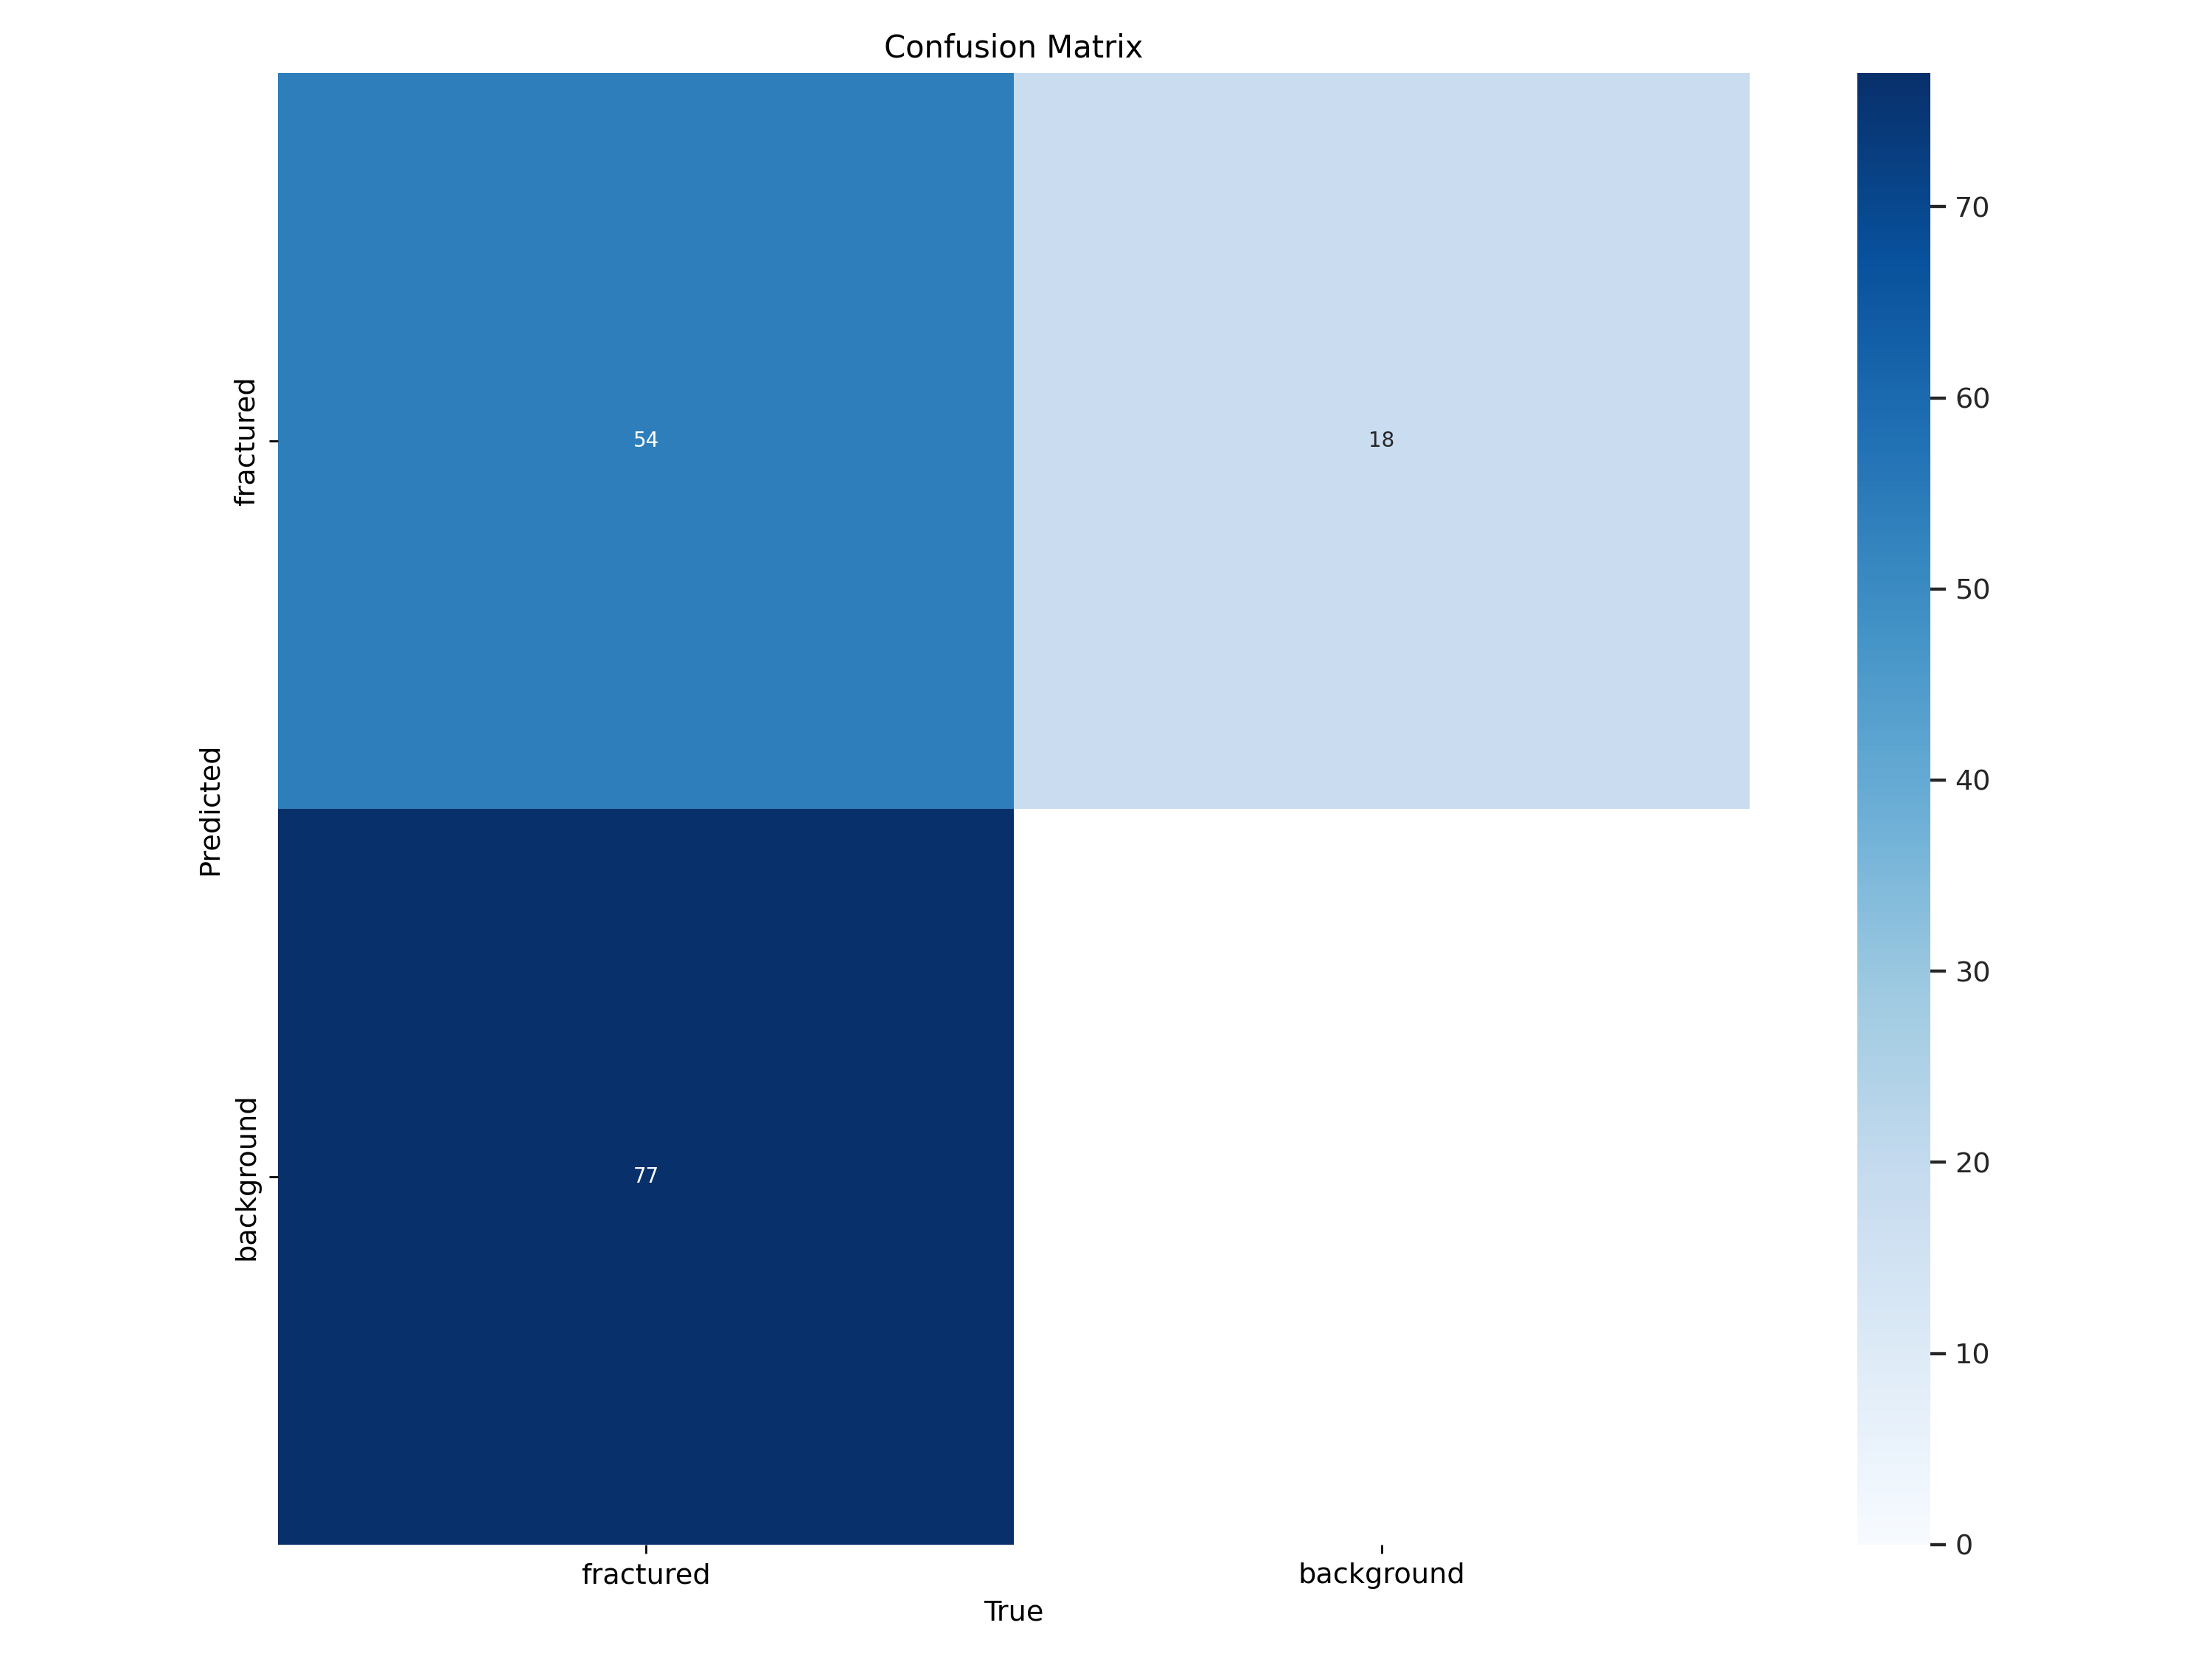

In [16]:
Image(filename='runs/detect/val/confusion_matrix.png', width=600)

In [ ]:
# !ls

!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf = 0.25 source = """/kaggle/input/xray-test-images/testing images/"""




Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/5 /kaggle/input/xray-test-images/testing images/diagnostic-imaging-x-ray-knee-east-melbourne.jpg: 640x640 (no detections), 16.3ms
image 2/5 /kaggle/input/xray-test-images/testing images/images (1).jpeg: 640x480 1 Fractured, 83.1ms
image 3/5 /kaggle/input/xray-test-images/testing images/images (2).jpeg: 640x544 6 Fractureds, 82.5ms
image 4/5 /kaggle/input/xray-test-images/testing images/images.jpeg: 480x640 3 Fractureds, 78.2ms
image 5/5 /kaggle/input/xray-test-images/testing images/xray-images-showing-real-fracture-of-broken-leg-bone-under-the-knee-after-injury-2K534R6.jpg: 640x640 (no detections), 17.0ms
Speed: 2.2ms preprocess, 55.4ms inference, 27.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf = 0.25 source = /kaggle/input/new-bone-xray-yolov8-format/new_bone_xray_dataset/test/images/


In [19]:
!zip -r file.zip runs/


  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/best.pt (deflated 7%)
  adding: runs/detect/train/weights/last.pt (deflated 7%)
  adding: runs/detect/train/args.yaml (deflated 53%)
  adding: runs/detect/train/events.out.tfevents.1705880118.c0a29e913284.5808.0 (deflated 89%)
  adding: runs/detect/train/labels_correlogram.jpg (deflated 38%)
  adding: runs/detect/train/labels.jpg (deflated 32%)
  adding: runs/detect/train/train_batch0.jpg (deflated 14%)
  adding: runs/detect/train/train_batch1.jpg (deflated 13%)
  adding: runs/detect/train/train_batch2.jpg (deflated 16%)
  adding: runs/detect/train/results.csv (deflated 86%)
  adding: runs/detect/val/ (stored 0%)
  adding: runs/detect/val/val_batch0_pred.jpg (deflated 19%)
  adding: runs/detect/val/val_batch0_labels.jpg (deflated 20%)
  adding: runs/detect/val/val_batch1_pred.jpg (deflated 19%)
  add

In [20]:
from IPython.display import FileLink
FileLink(r'file.zip')


/content/drive/MyDrive/Colab Notebooks/YOLO/file.zip